1. Run IMDB
- Experiment with one and three hidden layers
- Experiment with more or fewer hidden units - 32 units, 64 units etc.
- Investigate replacing the `binary_crossentropy` loss function with `mse`
- Experiment with replacing `relu` with `tanh` activations
- Investigate the effect of different learning rates
- Take your best network and train on all the training data for the optimal epochs. Evaluate on the test set

In [1]:
# IMDB

from tensorflow.keras.datasets import imdb
import numpy as np

def vectorize_sequences(sequences, dimension = 10000):
    results = np.zeros( (len(sequences), dimension) )
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

# load
((train_data, train_labels), (test_data, test_labels)) = imdb.load_data(num_words = 10000)

# preprocess
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

# build
from tensorflow.keras import models
from tensorflow.keras import layers
model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

# train
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(partial_x_train, 
                    partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data = (x_val, y_val)) 

Epoch 1/20
30/30 [==============================] - 17s 578ms/step - loss: 0.5496 - accuracy: 0.7708 - val_loss: 0.4161 - val_accuracy: 0.8632
Epoch 2/20
30/30 [==============================] - 9s 316ms/step - loss: 0.3378 - accuracy: 0.8962 - val_loss: 0.3613 - val_accuracy: 0.8620
Epoch 3/20
30/30 [==============================] - 7s 241ms/step - loss: 0.2476 - accuracy: 0.9253 - val_loss: 0.2920 - val_accuracy: 0.8896
Epoch 4/20
30/30 [==============================] - 7s 223ms/step - loss: 0.1941 - accuracy: 0.9391 - val_loss: 0.2758 - val_accuracy: 0.8913
Epoch 5/20
30/30 [==============================] - 8s 278ms/step - loss: 0.1593 - accuracy: 0.9500 - val_loss: 0.3401 - val_accuracy: 0.8647
Epoch 6/20
30/30 [==============================] - 6s 197ms/step - loss: 0.1309 - accuracy: 0.9619 - val_loss: 0.2944 - val_accuracy: 0.8861
Epoch 7/20
30/30 [==============================] - 7s 242ms/step - loss: 0.1099 - accuracy: 0.9673 - val_loss: 0.2999 - val_accuracy: 0.8845
Epoch

In [2]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [3]:
history_dict['loss']

[0.5496282577514648,
 0.3378387689590454,
 0.24763157963752747,
 0.19407957792282104,
 0.15929082036018372,
 0.13086581230163574,
 0.10993460565805435,
 0.09388826042413712,
 0.07656102627515793,
 0.06372390687465668,
 0.05443757399916649,
 0.044986579567193985,
 0.03647986426949501,
 0.029682623222470284,
 0.02478286623954773,
 0.020169466733932495,
 0.015200971625745296,
 0.01176106184720993,
 0.009430011734366417,
 0.008418984711170197]

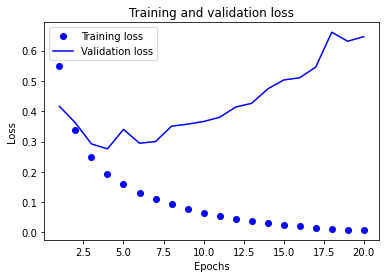

In [4]:
import matplotlib.pyplot as plt
    
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

blue_dots = 'bo'
solid_blue_line = 'b'

plt.plot(epochs, loss, blue_dots, label = 'Training loss')
plt.plot(epochs, val_loss, solid_blue_line, label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [5]:
history_dict['accuracy']

[0.770799994468689,
 0.8962000012397766,
 0.9253333210945129,
 0.9390666484832764,
 0.949999988079071,
 0.9618666768074036,
 0.9673333168029785,
 0.9732666611671448,
 0.9812666773796082,
 0.9840666651725769,
 0.9872666597366333,
 0.9904000163078308,
 0.9936000108718872,
 0.9954666495323181,
 0.996399998664856,
 0.9971333146095276,
 0.998199999332428,
 0.9988666772842407,
 0.9991333484649658,
 0.9992666840553284]

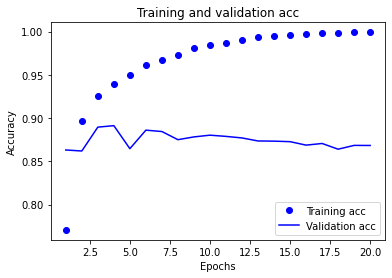

In [7]:
plt.clf()

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
    
epochs = range(1, len(acc) + 1)

blue_dots = 'bo'
solid_blue_line = 'b'
    
plt.plot(epochs, acc, blue_dots, label = 'Training acc')
plt.plot(epochs, val_acc, solid_blue_line, label = 'Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()